## Boston Gender with Python!!! and machine learning!!!


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
import csv
import numpy as np
import random
import scipy.stats as ss
import matplotlib.pyplot as plt



In [2]:
#from https://pypi.python.org/pypi/gender-guesser/0.4.0
#uses python 3 

import gender_guesser.detector as gender
d = gender.Detector()
print(d.get_gender(u"Bob"))

print(d.get_gender(u"Sally"))

print(d.get_gender(u"Pauley")) # should be androgynous
print(d.get_gender(u"Lopamudhra"))
print(d.get_gender(u"Shila"))


male
female
andy
unknown
female


In [3]:
#import the csv i downloaded from the website with the names -- could robotize this later..
# they have an API https://data.cityofboston.gov/Finance/Employee-Earnings-Report-2015/ah28-sywy
#pay_2016 = pd.read_csv("Employee_Earnings_Report_2016.csv")

#pay_2015 = pd.read_csv("Employee_Earnings_Report_2015.csv")
#pay_2014 = pd.read_csv("Employee_Earnings_Report_2014.csv")
#pay_2013 = pd.read_csv("boston_salary_raw_CSV/salary_2013.csv")

pay_2011 = pd.read_csv("boston_salary_raw_CSV/salary_2011.csv")



#pay_2016.head()

In [4]:
#pay_2016.info()
pay_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20509 entries, 0 to 20508
Data columns (total 12 columns):
Name               20509 non-null object
Department Name    20509 non-null object
Title              20509 non-null object
Regular            20509 non-null object
Retro              20509 non-null object
Other              20509 non-null object
Overtime           20509 non-null object
Injured            20509 non-null object
Detail             20508 non-null object
Quinn              20509 non-null object
Total Earnings     20509 non-null object
Zip Code           20509 non-null object
dtypes: object(12)
memory usage: 1.9+ MB


In [5]:
pay_2011.head(3)
#pay_2015.head(10)

Name               Department Name                      Title  \
0    Abadi,Kidani A          Assessing Department     Property Officer (Asn)   
1    Ablon,Jordan N  ASD Office Of Labor Relation      Asst Corp Counsel III   
2  Accardi,Patricia  Transportation-Parking Clerk  Chief Claims Investigator   

     Regular  Retro     Other Overtime Injured Detail  Quinn Total Earnings  \
0  $33065.38  $0.00     $0.00  $379.49   $0.00  $0.00  $0.00      $33444.87   
1  $76051.24  $0.00  $1321.03    $0.00   $0.00  $0.00  $0.00      $77372.27   
2  $56430.79  $0.00     $0.00  $418.58   $0.00  $0.00  $0.00      $56849.37   

     Zip Code  
0  02118-3126  
1  02135-5943  
2  02081-3751

what would I like to do now? for the graphic, I need to genderize, and then pick the top 100 people by pay.
the genderizer uses first name,so I need to make a column of first names..Ill start with the 2016 data set and aim to have this done soon to update my graphic...
...Ill have to experiment a bit with the genderizer so will pull out 20 names to test them..

In [6]:
#d_2016 = pay_2016 #copying the dataset to avoid changes
#d_2015 = pay_2015
d_2011 = pay_2011


#d_2016['regular'] = (d_2016['REGULAR'].replace( '[\$,)]','', regex=True ).astype(float))
#d_2016 = d_2016.rename(columns = {
#'REGULAR':"regular",
#"RETRO": "retro",})
                       
                       
#d_2016.head()
#d_2015.head()

In [7]:
d_2011.head(3)

Name               Department Name                      Title  \
0    Abadi,Kidani A          Assessing Department     Property Officer (Asn)   
1    Ablon,Jordan N  ASD Office Of Labor Relation      Asst Corp Counsel III   
2  Accardi,Patricia  Transportation-Parking Clerk  Chief Claims Investigator   

     Regular  Retro     Other Overtime Injured Detail  Quinn Total Earnings  \
0  $33065.38  $0.00     $0.00  $379.49   $0.00  $0.00  $0.00      $33444.87   
1  $76051.24  $0.00  $1321.03    $0.00   $0.00  $0.00  $0.00      $77372.27   
2  $56430.79  $0.00     $0.00  $418.58   $0.00  $0.00  $0.00      $56849.37   

     Zip Code  
0  02118-3126  
1  02135-5943  
2  02081-3751

In [8]:
#do I need to make sure other stuff is string?

d_2011['Regular'] = (d_2011['Regular'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2011['Retro'] = (d_2011['Retro'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2011['Other'] = (d_2011['Other'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2011['Overtime'] = (d_2011['Overtime'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2011['Injured'] = (d_2011['Injured'].replace( '[\$,)]','', regex=True ).astype(float)).round()
#in 2015 its detailS vs 2011,2016 detail 
#2013its just Quinn, not quinn/edu has in 2015 2016
d_2011['Quinn'] = (d_2011['Quinn'].replace( '[\$,)]','', regex=True ).astype(float)).round()
d_2011['Total Earnings'] = (d_2011['Total Earnings'].replace( '[\$,)]','', regex=True ).astype(float)).round()




In [9]:
d_2011['Detail'] = (d_2011['Detail'].replace( '[\$,)]','', regex=True ).astype(float)).round()

#for whatever reason in 2012 detail wouldnt change , but i dont need it so leaving it

In [10]:
d_2011.head()

Name               Department Name                      Title  \
0    Abadi,Kidani A          Assessing Department     Property Officer (Asn)   
1    Ablon,Jordan N  ASD Office Of Labor Relation      Asst Corp Counsel III   
2  Accardi,Patricia  Transportation-Parking Clerk  Chief Claims Investigator   
3    Ackerly,Lyn E.         Boston Public Library        Spec Library Asst I   
4    Adams,Carey L.                Law Department                 Prin Clerk   

   Regular  Retro   Other  Overtime  Injured  Detail  Quinn  Total Earnings  \
0  33065.0    0.0     0.0     379.0      0.0     0.0    0.0         33445.0   
1  76051.0    0.0  1321.0       0.0      0.0     0.0    0.0         77372.0   
2  56431.0    0.0     0.0     419.0      0.0     0.0    0.0         56849.0   
3  35059.0    0.0     0.0     439.0      0.0     0.0    0.0         35498.0   
4  41589.0    0.0     0.0       0.0      0.0     0.0    0.0         41589.0   

     Zip Code  
0  02118-3126  
1  02135-5943  
2  02081-3751  
3  02118-0000  
4  02131-4834

In [11]:


d_2011 = d_2011.rename(columns = {
'Regular':"salary",
'Retro':"retroactive",
'Other':'other',
'Overtime':'overtime',
'Detail':'detail',
'Injured':'injured',
'Quinn':'quinn',
'Total Earnings':'totalSalary',
'Name':'name',
"Department Name" : "dept",
"Title" : "title",
"Zip Code" : "zip_code",
    
    
})
d_2011.head()


#the csv used for d3(v3) jsI want to update has this: columns are name, 
#firstName, dept, salary, totalSalary(still has $), gender -- is just F or M 

name                          dept                      title  \
0    Abadi,Kidani A          Assessing Department     Property Officer (Asn)   
1    Ablon,Jordan N  ASD Office Of Labor Relation      Asst Corp Counsel III   
2  Accardi,Patricia  Transportation-Parking Clerk  Chief Claims Investigator   
3    Ackerly,Lyn E.         Boston Public Library        Spec Library Asst I   
4    Adams,Carey L.                Law Department                 Prin Clerk   

    salary  retroactive   other  overtime  injured  detail  quinn  \
0  33065.0          0.0     0.0     379.0      0.0     0.0    0.0   
1  76051.0          0.0  1321.0       0.0      0.0     0.0    0.0   
2  56431.0          0.0     0.0     419.0      0.0     0.0    0.0   
3  35059.0          0.0     0.0     439.0      0.0     0.0    0.0   
4  41589.0          0.0     0.0       0.0      0.0     0.0    0.0   

   totalSalary    zip_code  
0      33445.0  02118-3126  
1      77372.0  02135-5943  
2      56849.0  02081-3751  
3      35498.0  02118-0000  
4      41589.0  02131-4834

Round salaries to nearest dollar


In [12]:
import math
h = int(round(4.2))
h

4

### I ll split on the names
and now can see that there are some middle names 
so I'm going to use Regex to clean a bit..
if there is a Capitalized letter with nothing after, or a capitalized letter with a period, I want to split it, but otherwise Ill keep the two names, don't know how genderizer will handle them but well see..


had to do the splitting off of first name in two steps that probably should be one so can review later..below might help

#see this
#https://stackoverflow.com/questions/29585106/pandas-how-to-split-twice-a-given-field
 #try this:
trimmed_list = [i.replace('.', ',').split(',') for i in sbj[0].tolist() if i != ""]
item_list = [item.strip(whitespace) for item in itertools.chain(*trimmed_list)]
item_count = Counter(item_list)


In [13]:
firstname = d_2011.name.apply(lambda x: x.split(',')[1])
y = [name.split(" ")[0] for name in firstname]
y
#[]f_name.apply(lambda x: x.split(',')[1])
#first_name

#name_split = [name.split(',') for name in names]
#newlist = []
#for name in name_split:
 #   first = name[1]
  #  newlist.append(first)
#y = []
#for name in f_name:
 #   x = name.split(" ")
  #  y.append(x[0])
#print(y)




['Kidani',
 'Jordan',
 'Patricia',
 'Lyn',
 'Carey',
 'Dean',
 'Natasha',
 'Anthony',
 'Rocco',
 'Jose',
 'Luis',
 'Fred',
 'Susan',
 'Morteza',
 'Gary',
 'James',
 'Kathryn',
 'Adrian',
 'Wilson',
 'George',
 'Valerie',
 'Jeffery',
 'Roy',
 'Louis',
 'Lirida',
 'Omar',
 'Hector',
 'Jeffrey',
 'Jeffrey',
 'Alexandra',
 'Alexander',
 'Archie',
 'Glenroy',
 'Klare',
 'R',
 'Sharron',
 'Shiaka',
 'William',
 'Deborah',
 'Helen',
 'Scott',
 'Indira',
 'Manuela',
 'Michael',
 'Andrea',
 'Erin',
 'Deborah',
 'Diane',
 'Michele',
 'Teresa',
 'Carl',
 'Jimmie',
 'Paul',
 'Christine',
 'Lawrence',
 'Erik',
 'Erin',
 'Frederick',
 'Kerry',
 'Matthew',
 'Maureen',
 'Patricia',
 'Richard',
 'Roger',
 'Taraneisha',
 'Tracey',
 'Angel',
 'Martin',
 'Eunice',
 'Richard',
 'Carmen',
 'Arreen',
 'Lionel',
 'Prema',
 'Melissa',
 'Peter',
 'Robert',
 'Elaine',
 'Jean',
 'Geraldine',
 'Jennifer',
 'John',
 'Walter',
 'Brent',
 'Susan',
 'Pamela',
 'Ronald',
 'Antonio',
 'Christine',
 'Al',
 'Ellen',
 'Shi

create a column called first name, last name and one called gender

In [14]:
#firstName = d_2011.name.apply(lambda x: x.split(',')[1])
#y = [name.split(" ")[0] for name in firstName]


import gender_guesser.detector as gender
d = gender.Detector()

gender = []

for name in y:
    gender_it = d.get_gender(name)
    gender.append(gender_it)

d_2011["firstName"] = y
d_2011["gender"] = gender

Do the whole data set, create a column of first name and a column of gender, i need to make it match eventually
what I used in my D3 csv to avoid hassle when recreating the graphic

In [15]:

d_2011.head()

name                          dept                      title  \
0    Abadi,Kidani A          Assessing Department     Property Officer (Asn)   
1    Ablon,Jordan N  ASD Office Of Labor Relation      Asst Corp Counsel III   
2  Accardi,Patricia  Transportation-Parking Clerk  Chief Claims Investigator   
3    Ackerly,Lyn E.         Boston Public Library        Spec Library Asst I   
4    Adams,Carey L.                Law Department                 Prin Clerk   

    salary  retroactive   other  overtime  injured  detail  quinn  \
0  33065.0          0.0     0.0     379.0      0.0     0.0    0.0   
1  76051.0          0.0  1321.0       0.0      0.0     0.0    0.0   
2  56431.0          0.0     0.0     419.0      0.0     0.0    0.0   
3  35059.0          0.0     0.0     439.0      0.0     0.0    0.0   
4  41589.0          0.0     0.0       0.0      0.0     0.0    0.0   

   totalSalary    zip_code firstName         gender  
0      33445.0  02118-3126    Kidani        unknown  
1      77372.0  02135-5943    Jordan           male  
2      56849.0  02081-3751  Patricia         female  
3      35498.0  02118-0000       Lyn  mostly_female  
4      41589.0  02131-4834     Carey           andy

In [16]:
lastName = d_2011.name.apply(lambda x: x.split(',')[0])
#y = [name.split(" ")[0] for name in firstName]
#y
lastName.head()

0      Abadi
1      Ablon
2    Accardi
3    Ackerly
4      Adams
Name: name, dtype: object

In [17]:

d_2011["lastName"] = lastName
d_2011.head()

name                          dept                      title  \
0    Abadi,Kidani A          Assessing Department     Property Officer (Asn)   
1    Ablon,Jordan N  ASD Office Of Labor Relation      Asst Corp Counsel III   
2  Accardi,Patricia  Transportation-Parking Clerk  Chief Claims Investigator   
3    Ackerly,Lyn E.         Boston Public Library        Spec Library Asst I   
4    Adams,Carey L.                Law Department                 Prin Clerk   

    salary  retroactive   other  overtime  injured  detail  quinn  \
0  33065.0          0.0     0.0     379.0      0.0     0.0    0.0   
1  76051.0          0.0  1321.0       0.0      0.0     0.0    0.0   
2  56431.0          0.0     0.0     419.0      0.0     0.0    0.0   
3  35059.0          0.0     0.0     439.0      0.0     0.0    0.0   
4  41589.0          0.0     0.0       0.0      0.0     0.0    0.0   

   totalSalary    zip_code firstName         gender lastName  
0      33445.0  02118-3126    Kidani        unknown    Abadi  
1      77372.0  02135-5943    Jordan           male    Ablon  
2      56849.0  02081-3751  Patricia         female  Accardi  
3      35498.0  02118-0000       Lyn  mostly_female  Ackerly  
4      41589.0  02131-4834     Carey           andy    Adams

In [18]:
d_2011.isnull().sum()

name           0
dept           0
title          0
salary         0
retroactive    0
other          0
overtime       0
injured        0
detail         1
quinn          0
totalSalary    0
zip_code       0
firstName      0
gender         0
lastName       0
dtype: int64

In [19]:

d_2011["fullName"] = d_2011["firstName"] + " " + d_2011["lastName"]
#dataframe["period"] = dataframe["Year"].map(str) + dataframe["quarter"]
d_2011.head()

name                          dept                      title  \
0    Abadi,Kidani A          Assessing Department     Property Officer (Asn)   
1    Ablon,Jordan N  ASD Office Of Labor Relation      Asst Corp Counsel III   
2  Accardi,Patricia  Transportation-Parking Clerk  Chief Claims Investigator   
3    Ackerly,Lyn E.         Boston Public Library        Spec Library Asst I   
4    Adams,Carey L.                Law Department                 Prin Clerk   

    salary  retroactive   other  overtime  injured  detail  quinn  \
0  33065.0          0.0     0.0     379.0      0.0     0.0    0.0   
1  76051.0          0.0  1321.0       0.0      0.0     0.0    0.0   
2  56431.0          0.0     0.0     419.0      0.0     0.0    0.0   
3  35059.0          0.0     0.0     439.0      0.0     0.0    0.0   
4  41589.0          0.0     0.0       0.0      0.0     0.0    0.0   

   totalSalary    zip_code firstName         gender lastName          fullName  
0      33445.0  02118-3126    Kidani        unknown    Abadi      Kidani Abadi  
1      77372.0  02135-5943    Jordan           male    Ablon      Jordan Ablon  
2      56849.0  02081-3751  Patricia         female  Accardi  Patricia Accardi  
3      35498.0  02118-0000       Lyn  mostly_female  Ackerly       Lyn Ackerly  
4      41589.0  02131-4834     Carey           andy    Adams       Carey Adams

change the order of the columns


In [20]:
cols = list(d_2011.columns.values)
cols

['name',
 'dept',
 'title',
 'salary',
 'retroactive',
 'other',
 'overtime',
 'injured',
 'detail',
 'quinn',
 'totalSalary',
 'zip_code',
 'firstName',
 'gender',
 'lastName',
 'fullName']

In [21]:
#reorder columns a bit
d_2011 = d_2011[[

    'fullName',
 'gender',
     'name',
'firstName',
    'lastName',
 'salary',
'totalSalary',
'dept',
 'title',
 'retroactive',
 'other',
 'overtime',
 'injured',
 #'detail', 2011 nope
 'quinn',
 'zip_code', 
 ]]
d_2011.head()

fullName         gender              name firstName lastName  \
0      Kidani Abadi        unknown    Abadi,Kidani A    Kidani    Abadi   
1      Jordan Ablon           male    Ablon,Jordan N    Jordan    Ablon   
2  Patricia Accardi         female  Accardi,Patricia  Patricia  Accardi   
3       Lyn Ackerly  mostly_female    Ackerly,Lyn E.       Lyn  Ackerly   
4       Carey Adams           andy    Adams,Carey L.     Carey    Adams   

    salary  totalSalary                          dept  \
0  33065.0      33445.0          Assessing Department   
1  76051.0      77372.0  ASD Office Of Labor Relation   
2  56431.0      56849.0  Transportation-Parking Clerk   
3  35059.0      35498.0         Boston Public Library   
4  41589.0      41589.0                Law Department   

                       title  retroactive   other  overtime  injured  quinn  \
0     Property Officer (Asn)          0.0     0.0     379.0      0.0    0.0   
1      Asst Corp Counsel III          0.0  1321.0       0.0      0.0    0.0   
2  Chief Claims Investigator          0.0     0.0     419.0      0.0    0.0   
3        Spec Library Asst I          0.0     0.0     439.0      0.0    0.0   
4                 Prin Clerk          0.0     0.0       0.0      0.0    0.0   

     zip_code  
0  02118-3126  
1  02135-5943  
2  02081-3751  
3  02118-0000  
4  02131-4834

messing about with the name split 

name_split = [name.split(',') for name in names]
newlist = []
for name in name_split:
    first = name[1]
    newlist.append(first)
y = []
for name in newlist:
    x = name.split(" ")
    y.append(x[0])

#add y as a column in the data set

d_2016["first_names"] = y
d_2016.head()


messing about

import gender_guesser.detector as gender
d = gender.Detector()

gender = []

for name in y:
    gender_it = d.get_gender(name)
    gender.append(gender_it)
d_2016["gender"] = gender
d_2016.head()

shortdf = d_2016[["NAME","first_names","gender","REGULAR"]] #I can add stuff here later and rerun for my csv, ie department
print(shortdf.sort_values(by=['gender'],ascending=True))

now I'd like to see how many there are of each type in the new gender column...

In [22]:
d_2011['gender'].value_counts() #andy is androgynous

female           8874
male             8595
unknown          1671
mostly_female     928
mostly_male       295
andy              146
Name: gender, dtype: int64

df.loc[df['First Season'] > 1990, 'First Season'] = 1

In [23]:
d_2011.loc[d_2011['gender'] == "mostly_female", "gender"] = "female"
d_2011.loc[d_2011['gender'] == "mostly_male", "gender"] = "male"
d_2011['gender'].value_counts() #andy is androgynous

female     9802
male       8890
unknown    1671
andy        146
Name: gender, dtype: int64

I'm going to group mostly's into their respective groups

im going to sort by top 100 earners to see how many of those have different value counts since
that's what I use in my chart


these two women are listed as unknowns, since I looked them up im going to fix in the data set..
13129          McCreary,Makeeba   Makeeba                 Communications   
6050   Edouard-Vincent,Marice M    Marice  Asst Superintendent-Network A 

In [24]:
d_2011.loc[d_2011['name'] == "McCreary,Makeeba", "gender"] = "female"
d_2011.loc[d_2011['name'] == "Edouard-Vincent,Marice M", "gender"] = "female"
d_2011.loc[d_2011['name'] == "Chavda,Kamalkant A", "gender"] = "male"
d_2011.loc[d_2011['fullName'] == "Queon Jackson", "gender"] = "male"


#Chavda,Kamalkant A
#Queon, Jackson
d_2011['gender'].value_counts()

female     9803
male       8892
unknown    1668
andy        146
Name: gender, dtype: int64

In [25]:
unknowns = d_2011[(d_2011['gender']== "unknown")]
#MM = shortForCsv[(shortForCsv['gender']== "mostly_male")]
#MF = shortForCsv[(shortForCsv['gender']== "mostly_female")]
print(unknowns) 
#since its a fairly short list Im going to look them up on the intraweb but this is something I should automate or skip those 
#names, or make my own additional filter using social security names?
#i Can also add the ones Ive checked to these lists so they are 

                   fullName   gender                    name   firstName  \
0              Kidani Abadi  unknown          Abadi,Kidani A      Kidani   
24     Lirida Alfonso-Colon  unknown  Alfonso-Colon,Lirida C      Lirida   
32            Glenroy Allen  unknown           Allen,Glenroy     Glenroy   
34                  R Allen  unknown           Allen,R Scott           R   
36             Shiaka Allen  unknown            Allen,Shiaka      Shiaka   
64      Taraneisha Anderson  unknown     Anderson,Taraneisha  Taraneisha   
71            Arreen Andrew  unknown           Andrew,Arreen      Arreen   
73             Prema Andrew  unknown          Andrew,Prema L       Prema   
95         Krishante Arocho  unknown        Arocho,Krishante   Krishante   
105         Woodley Auguste  unknown         Auguste,Woodley     Woodley   
110          Jeannete Ayala  unknown          Ayala,Jeannete    Jeannete   
115          Rakeem Badgett  unknown        Badgett,Rakeem R      Rakeem   
121         

In [26]:
d_2011.dtypes


fullName        object
gender          object
name            object
firstName       object
lastName        object
salary         float64
totalSalary    float64
dept            object
title           object
retroactive    float64
other          float64
overtime       float64
injured        float64
quinn          float64
zip_code        object
dtype: object

In [27]:
print(d_2011.shape)
d_2011.columns


(20509, 15)


Index(['fullName', 'gender', 'name', 'firstName', 'lastName', 'salary',
       'totalSalary', 'dept', 'title', 'retroactive', 'other', 'overtime',
       'injured', 'quinn', 'zip_code'],
      dtype='object')

In [28]:
d_2011.head()

fullName   gender              name firstName lastName   salary  \
0      Kidani Abadi  unknown    Abadi,Kidani A    Kidani    Abadi  33065.0   
1      Jordan Ablon     male    Ablon,Jordan N    Jordan    Ablon  76051.0   
2  Patricia Accardi   female  Accardi,Patricia  Patricia  Accardi  56431.0   
3       Lyn Ackerly   female    Ackerly,Lyn E.       Lyn  Ackerly  35059.0   
4       Carey Adams     andy    Adams,Carey L.     Carey    Adams  41589.0   

   totalSalary                          dept                      title  \
0      33445.0          Assessing Department     Property Officer (Asn)   
1      77372.0  ASD Office Of Labor Relation      Asst Corp Counsel III   
2      56849.0  Transportation-Parking Clerk  Chief Claims Investigator   
3      35498.0         Boston Public Library        Spec Library Asst I   
4      41589.0                Law Department                 Prin Clerk   

   retroactive   other  overtime  injured  quinn    zip_code  
0          0.0     0.0     379.0      0.0    0.0  02118-3126  
1          0.0  1321.0       0.0      0.0    0.0  02135-5943  
2          0.0     0.0     419.0      0.0    0.0  02081-3751  
3          0.0     0.0     439.0      0.0    0.0  02118-0000  
4          0.0     0.0       0.0      0.0    0.0  02131-4834

In [29]:
#Get a sense of how many missing values there are in the dataframe.
print(np.sum([d_2011.salary.isnull()]))
np.sum([d_2011.gender.isnull()])

0


0

In [30]:
salarySorted = d_2011.sort_values(by='salary', ascending=False)
salarySorted.head()



fullName  gender              name firstName   lastName  \
13848   Carol Johnson  female   Johnson,Carol R     Carol    Johnson   
2960         Amy Ryan  female        Ryan,Amy E       Amy       Ryan   
2282    Thomas Menino    male  Menino,Thomas M.    Thomas     Menino   
15591  John McDonough    male  McDonough,John P      John  McDonough   
12560    Michael Goar    male      Goar,Michael   Michael       Goar   

         salary  totalSalary                   dept                    title  \
13848  266750.0     323222.0  Boston Public Schools           Superintendent   
2960   175000.0     195000.0  Boston Public Library                President   
2282   175000.0     175000.0         Mayor's Office                    Mayor   
15591  174492.0     177725.0  Boston Public Schools  Chief Financial Officer   
12560  174407.0     177715.0  Boston Public Schools    Deputy Superintendent   

       retroactive    other  overtime  injured  quinn    zip_code  
13848          0.0  56472.0       0.0      0.0    0.0  02129-4233  
2960           0.0  20000.0       0.0      0.0    0.0  02135-1517  
2282           0.0      0.0       0.0      0.0    0.0  02136-1932  
15591          0.0   3233.0       0.0      0.0    0.0  02130-3451  
12560          0.0   3308.0       0.0      0.0    0.0  02124-5601

In [31]:
#need to fix the 2014 department names to match the d3 names and also format the full names since writtenbadly for tooltip use
#new_names = {'DEPARTMENT NAME':'dept'}
#salarySorted = salarySorted.rename(index=str, columns=new_names)


In [32]:
#create a new name column for better tool tip use by joining firstName and lastName columns into one


so i have what i need above to export to csv and update my graph...START HERE
-- after updating, play with bokeh here? do a new sheet to update FBI crime project?

the csv used for d3(v3) jsI want to update has this: columns are name, firstName, dept, salary, totalSalary(still has $), gender -- is just F or M 
so make a truncated version of the csv
name in this style to be like existing csv:
a_data_boston_2014_employee_top_100

In [33]:
#make csv with just the earlier data columns ie 6 of them newdf = df[(df['column_one']>2004) & (df['column_two']==9)]
#AND JUST PICK THE TOP 100 
shortForCsv = salarySorted[["fullName","firstName", "name", "gender","salary", "totalSalary","dept" ]].head(100)
#df1 = df[['a','b']]
#df1 = df.ix[:,0:2]
#shortForCsv['gender'].value_counts()



In [34]:
salarySorted

fullName   gender  \
13848        Carol Johnson   female   
2960              Amy Ryan   female   
2282         Thomas Menino     male   
15591       John McDonough     male   
12560         Michael Goar     male   
8265         Bernard Tully     male   
7285   Roderick Fraser Jr.     male   
4365          Edward Davis     male   
7269        Gerard Fontana     male   
7348         David Granara     male   
7198           James Evans     male   
7125       Michael Doherty     male   
7014          John Coppney     male   
5360        Daniel Linskey     male   
7111   Richard DiBenedetto     male   
7172     Robert Dunderdale     male   
7171        Stephen Dunbar     male   
7242        Joseph Fleming     male   
7425        John Henderson     male   
7224           Joseph Finn     male   
7411           John Hasson     male   
7530          David Joseph     male   
7468     Curtis Holzendorf     male   
2505         William Oates     male   
6893            Paul Burke     male   
5035        Bruce Holloway     male   
6187           Rafael Ruiz     male   
4566         William Evans     male   
4642       Paul Fitzgerald     male   
4694          Kenneth Fong     male   
...                    ...      ...   
6242         Ladawn Savage  unknown   
20167    Jennifer Williams   female   
12687       Margo Gottlieb   female   
6390           Jesse Stots     male   
804     John Dechristoforo     male   
15663          Donna McKay   female   
9833            Wanda Cain   female   
11418      Edmund Donnelly     male   
9837          Jody Calabro   female   
11411         David Donato     male   
15670       Judith McKenna   female   
15701      John McLaughlin     male   
17516       Linda Radonsky   female   
811        Carol Degiacomo   female   
20170     Juliana Williams   female   
12039       Amilcar Flores     male   
14139           Elise Keel   female   
6134          Edward Roake     male   
19200      Stephen Tassone     male   
17487         Grace Quigua   female   
9966          Mary Carideo   female   
11388       Judith Doherty   female   
13628       Danette Ingram   female   
11373      Christina Dobbs   female   
12689           Ruth Gough   female   
7360           Paul Greene     male   
6870         Francis Brown     male   
5342        Rupert Leonard     male   
7683     Frederick Magrath     male   
7469         William Honen     male   

                                                    name  firstName  \
13848                                    Johnson,Carol R      Carol   
2960                                          Ryan,Amy E        Amy   
2282                                    Menino,Thomas M.     Thomas   
15591                                   McDonough,John P       John   
12560                                       Goar,Michael    Michael   
8265                                    Tully,Bernard J.    Bernard   
7285                               Fraser Jr.,Roderick J   Roderick   
4365                                      Davis,Edward F     Edward   
7269                                   Fontana,Gerard T.     Gerard   
7348                               Granara,David Richard      David   
7198                                       Evans,James R      James   
7125                                  Doherty,Michael J.    Michael   
7014                                     Coppney,John T.       John   
5360                                    Linskey,Daniel P     Daniel   
7111                            DiBenedetto,Richard John    Richard   
7172                                   Dunderdale,Robert     Robert   
7171                                    Dunbar,Stephen K    Stephen   
7242                              Fleming,Joseph Michael     Joseph   
7425                                      Henderson,John       John   
7224                                      Finn,Joseph E.     Joseph   
7411                                         Hasson,John       John   
7530                                 

bring the csv formula lower later..

I havent done anything about the gender groups yet, I need to make them into M or F and get rid of or 
check the unknowns and mostly's...'

In [35]:
shortForCsv['gender'].value_counts()

male      90
female    10
Name: gender, dtype: int64

In [36]:
mostly_female = shortForCsv[(shortForCsv['gender']== "mostly_female")]
print(mostly_female)
# carol johnson woman

Empty DataFrame
Columns: [fullName, firstName, name, gender, salary, totalSalary, dept]
Index: []


McCreary - F
https://www.bostonpublicschools.org/site/default.aspx?PageType=3&ModuleInstanceID=9715&ViewID=7b97f7ed-8e5e-4120-848f-a8b4987d588f&RenderLoc=0&FlexDataID=7541&PageID=4853

 Edouard-Vincent,Marice - F
https://twitter.com/netsuptb?lang=en

McGovern,Ryan J -- M
http://www.firehouse.com/news/11252963/after-falling-through-floor-boston-firefighter-thankful-for-minor-injuries

Franklin-Hodge,Jascha -- M
https://www.boston.gov/departments/innovation-and-technology/jascha-franklin-hodge

  Nee,Kelly A  -- F
https://www.youtube.com/watch?v=2x7OrSKi_04

 Driscoll,Mary E      Mary  Asst Superintendent-Network A - F
 https://www.bc.edu/schools/csom/lynchacademy/alumni/2012/Driscoll.html
 
  Hung,Kelly M     Kelly  Asst Superintendent-Network A  153503.93 -- F
  
  https://www.bc.edu/schools/csom/lynchacademy/alumni/2014/KHung.html
  
  Chavda,Kamalkant A
  
  http://picssr.com/photos/bostonfoundation/interesting/page2?nsid=64189140@N04
  
  Queon, Jackson - male
  https://www.bostonglobe.com/metro/2016/08/05/paid-leave-dragged-years-former-boston-headmaster-collected/E5kOej6eS7LOeBC40IVkfO/story.html
  
  Meredith Weenick woman
  https://www.cityofboston.gov/oldnews/Default.aspx?id=8598
  
  Kelly Nee woman
  https://www.bu.edu/today/2017/bupd-chief-kelly-nee/
  
  Kimberly Rice
  https://twitter.com/kimberlyarice?lang=en

NEED TO FIX THE WEB LINK ON THE CHARTS PAGE TO GO TO 2016

I could look up the mostly and unknowns to confirm their gender -- its just 7 peeps

In [37]:
shortForCsv.head()

fullName firstName              name  gender    salary  \
13848   Carol Johnson     Carol   Johnson,Carol R  female  266750.0   
2960         Amy Ryan       Amy        Ryan,Amy E  female  175000.0   
2282    Thomas Menino    Thomas  Menino,Thomas M.    male  175000.0   
15591  John McDonough      John  McDonough,John P    male  174492.0   
12560    Michael Goar   Michael      Goar,Michael    male  174407.0   

       totalSalary                   dept  
13848     323222.0  Boston Public Schools  
2960      195000.0  Boston Public Library  
2282      175000.0         Mayor's Office  
15591     177725.0  Boston Public Schools  
12560     177715.0  Boston Public Schools

it would be nice to add additioal charts to that page, like for 2016 are the highest paid workers in 
each dept male or female? not sure how to make a simple graph like that, dot matrix?

it seems like tommy chang is top earner but comes up as superintendent, rather than school system. going to take a look at how they label departments in the larger data set..

In [38]:
print(shortForCsv["gender"].value_counts()) 
d_2011['gender'].value_counts() 


male      90
female    10
Name: gender, dtype: int64


female     9803
male       8892
unknown    1668
andy        146
Name: gender, dtype: int64

I'm going to group the schools for the top 100 under Boston Public Schools

In [39]:
#test = shortForCsv[(shortForCsv['dept']== "Fam & Student Engagemt")]
#test1 = shortForCsv[(shortForCsv['dept']== "Achievement Gap")]
test2 = shortForCsv[(shortForCsv['dept']== "Dpt of Innovation & Technology")]
shortForCsv.loc[shortForCsv['dept'] == "Law Department", "dept"] = "Law"
shortForCsv.loc[shortForCsv['dept'] == "Dpt of Innovation & Technology", "dept"] = "Innovation & Technology"



test2


fullName firstName           name gender    salary  totalSalary  \
2505  William Oates   William  Oates,William   male  154875.0     157853.0   

                                dept  
2505  Dpt of Innovation & Technology

In [40]:
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network A", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Special Education", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Fam & Student Engagemt", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Achievement Gap", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Kennedy, EM Health Academy", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Human Resource Team", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Superintendent", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network G", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network B", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Boston Latin", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network E", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network F", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "Asst Superintendent-Network D", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Equity", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS English High", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Murphy Elementary", "dept"] = "Boston Public Schools"
shortForCsv.loc[shortForCsv['dept'] == "BPS Brighton High", "dept"] = "Boston Public Schools"




#put school chief chang in new school dept group not needed
#shortForCsv.loc[shortForCsv['name'] == "Chang,Tommy", "dept"] = "Boston Public Schools"
#shortForCsv.loc[shortForCsv['name'] == "Chavda,Kamalkant A", "gender"] = "male"




shortForCsv["dept"].value_counts()

Boston Fire Department          57
Boston Police Department        20
Boston Public Schools           12
Mayor's Office                   3
Boston Public Library            1
Treasury-Treasury Division       1
Property Management              1
Assessing Department             1
State Boston Retirement Syst     1
Neighborhood Development         1
Innovation & Technology          1
Law                              1
Name: dept, dtype: int64

In [41]:
shortForCsv['gender'].value_counts()

male      90
female    10
Name: gender, dtype: int64

In [42]:
b = d_2011[(d_2011['dept']== "Superintendent")]
b
#could check to see if all these people are in BPS to change the category overall..

Empty DataFrame
Columns: [fullName, gender, name, firstName, lastName, salary, totalSalary, dept, title, retroactive, other, overtime, injured, quinn, zip_code]
Index: []

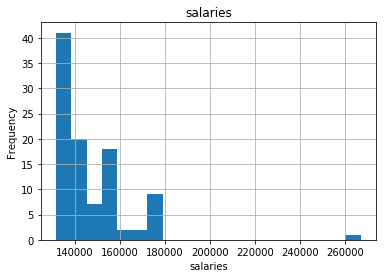

In [43]:
#Generate histograms using the format df.YOUR_CHOICE_OF_COLUMN_NAME.hist(bins=YOUR_CHOICE_OF_BIN_SIZE)

shortForCsv.salary.hist(bins=20)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();



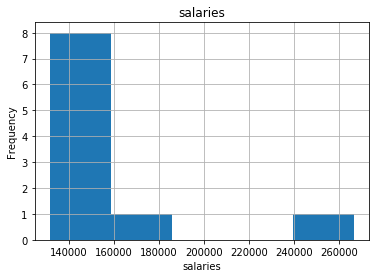

In [44]:

shortForCsv[shortForCsv.gender == "female"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();




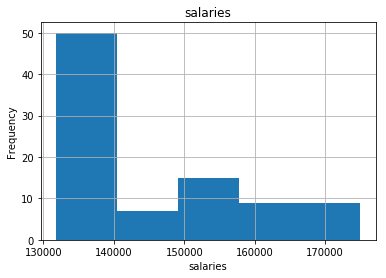

In [45]:
shortForCsv[shortForCsv.gender == "male"].salary.hist(bins=5)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();





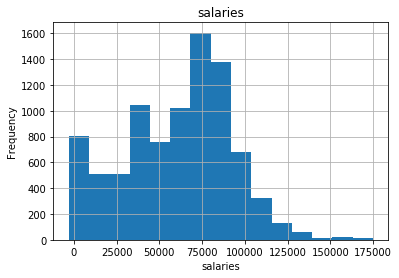

In [46]:
#d_2015
d_2011[d_2011.gender == "male"].salary.hist(bins=15)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();





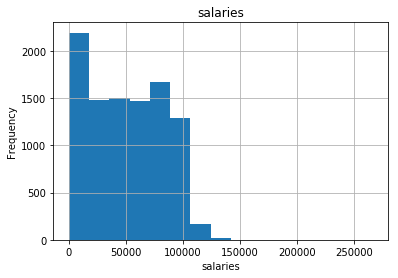

In [47]:
#d_2015
d_2011[d_2011.gender == "female"].salary.hist(bins=15)
plt.xlabel('salaries')
plt.ylabel('Frequency')
plt.title('salaries');

plt.show();





In [48]:
shortForCsv.to_csv("top100_2011", index=False)

In [49]:
shortForCsv.head

<bound method NDFrame.head of                    fullName firstName                      name  gender  \
13848         Carol Johnson     Carol           Johnson,Carol R  female   
2960               Amy Ryan       Amy                Ryan,Amy E  female   
2282          Thomas Menino    Thomas          Menino,Thomas M.    male   
15591        John McDonough      John          McDonough,John P    male   
12560          Michael Goar   Michael              Goar,Michael    male   
8265          Bernard Tully   Bernard          Tully,Bernard J.    male   
7285    Roderick Fraser Jr.  Roderick     Fraser Jr.,Roderick J    male   
4365           Edward Davis    Edward            Davis,Edward F    male   
7269         Gerard Fontana    Gerard         Fontana,Gerard T.    male   
7348          David Granara     David     Granara,David Richard    male   
7198            James Evans     James             Evans,James R    male   
7125        Michael Doherty   Michael        Doherty,Michael J.    mal

In [50]:
import seaborn as sns
#x = shortForCsv["dept"]
#y = shortForCsv["gender"]
sns.lmplot("dept", "gender", data=shortForCsv, fit_reg=False)
#ax = sns.stripplot(x=shortForCsv["dept"])

#d_2016["firstName"] = y
#d_2016["gender"] = gender

TypeError: Could not convert femalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalemalemalefemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalemalefemalemalemalefemalemalemalemalefemalefemalemalefemalemalemalemalemalemalemalemalemalefemale to numeric

Im going to add mostly female and mostly males to females and males respectively, and group androgynous and unknown into one group...maybe ill use them later 

#trying a second gender dectector
#couldn't geet it to work..
#import gender_guesser.detector as gender
import gender_detector.gender_detector as gender2
#detector = gender_detector('us') # It can also be ar, uk, uy.
gender2.guess('Marcos') # => 'male'
#from gender_detector import GenderDetector
#detector = GenderDetector('us') # It can also be ar, uk, uy.
#detector.guess('Marcos') # => 'male'

In [ ]:
max(pay_2016.regular)

In [ ]:
min(pay_2016.regular)

In [ ]:
x = pay_2016.iloc[:, 0:1]  #all rows, column 1

In [ ]:
x


In [ ]:
plt.plot(x)
plt.show()

In [ ]:
print x.mean(), x.max(), x.min(), x.mode()

In [ ]:
print birds["speed_2d"].mean(), birds["speed_2d"].max(), birds["speed_2d"].min(), birds["speed_2d"].mode()

We'll get started by simply plotting the latitude and longitude of a flight
trajectory for a single bird in a standard two dimensional plot.
Latitude and longitude are coordinates along the surface of a sphere,
where a standard 2-D plot is a plane
so we would expect very strong distortions
for the flight trajectories.
This is especially true because the trajectories
cover a large spatial region.
We're doing this however, primarily to have a quick way to look at the data
and develop more intuition about it.
We'll be doing an actual cartographic projection later in this case study.


ACCESS ONE COLUMN

In [ ]:
#so grab flight trajectories of single bird 
#birds[bird_name == "Eric"] WRONG! maybe works in np or somewhere?
#makes a boolean
ix = birds.bird_name == "Eric" #for pandas this is how to access column


In [ ]:
#one_bird = birds["latitude"]["longitude", "bird_name"]
#so hes using the ix seems to only grab values if they are True, ie Eric
x, y = birds.longitude[ix], birds.latitude[ix]

In [ ]:
birds.longitude[ix].head()

In [ ]:
plt.subplot(211)
plt.plot(x,y,"ob")
plt.subplot(212)
plt.plot(x,y,) #just shows default is prettier
plt.show()

plot more birds...


In [ ]:
birds.bird_name.tail(10)

using unique...

In [ ]:
#but he does something better than this
#ia = birds.bird_name == "Sanne"
#ic = birds.bird_name == "Nico"
names = pd.unique(birds.bird_name)
names

In [ ]:
#having trouble with this, see how he does it below
#he skips making a new dict or list and just puts them in the graph
#latlong = {}
#for i in names:
 #   ix = birds.bird_name == i
  #  x = birds.latitude[ix], 
   # y = birds.longitude[ix]
    #latlong[x] == y

#latlong

In [ ]:
#his example WOW! very cool...
#plt.figure(figsize=(7,7)) # he puts the figure creation outside the loop
#even though  i dont it so blocked it out
for name in names:
    ix = birds.bird_name == name
    x,y = birds.longitude[ix], birds.latitude[ix] #be aware the order you put them in, I had them opposite
    plt.plot(x, y, ".", label=name) #so for the legend to work, have to add the label here! otherwise it just says longitdue...guess the last label available to it
plt.xlabel("Longitude")
plt.ylabel("Latitude") #make sure labels match the data ie x to x and y to latitude
plt.legend(loc="lower right")
plt.show() #im putting this down here and imagine it will work?

In [ ]:
a,b = birds.latitude[ia], birds.longitude[ia]
c,d = birds.latitude[ic], birds.longitude[ic]

In [ ]:
plt.plot(x, y) #this also is quite different from the above, wonder why?
plt.plot(a, b)
plt.plot(c, d)
plt.show()

* Learn how to examine 2D flight speed of the birds
* Learn how to deal with data entries that are not numeric
* The data also contain estimates of two dimensional speeds of the birds.
That is how fast they were flying on a 2D
plane that is a local approximation to the curved surface of the earth.
Let's look at the speed data in a little bit more detail.

In [ ]:
ix = birds.bird_name == "Eric"
speed = birds.speed_2d[ix]
speed


hist doesnt like it when there are null values so the below
doesnt run..until they are eliminated..he starts by doing first 10 rows only, so good idea...

In [ ]:
plt.hist(speed[:10]) 
plt.show()

are there non number objects? ..below are useful tests using numpy

In [ ]:
np.isnan(speed) #i dont see any trues but this is a good way to look
np.isnan(speed).any()#this is much better since it tell us that there is a null value
np.sum(np.isnan(speed)) #sum all the isnans... I got alot more than him??

turn a list to its opposite with ~

In [ ]:
ind = np.isnan(speed)
ind #ind is a true and false list..the NANs are true
~ind #interesting way to get the mirror opposite of ind, the non nans are now TRUE

In [ ]:
#this looks the same as dropna which is less work! interesting to use that idea thought
ind = np.isnan(speed)
plt.hist(speed[~ind])
plt.show()

In [ ]:
#kind of weird looking though..?
# I used dropna here, 
u = speed.dropna()
plt.hist(u)
plt.show()

add x label, y label, and make the bins normalized


### it looks alot better adding more bins
* the y axis is normalized, meaning
that an integral over the histogram would be equal to 1.
* numpy.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)[source]
Return evenly spaced numbers over a specified interval.

In [ ]:
ind = np.isnan(speed)
plt.hist(speed[~ind], bins = np.linspace(0,30,20), normed = True)
#i see in docs normed has been deprecated so swapping that with "density",
#which doesnt work in python 2
plt.xlabel("2D Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

### Pandas 
provide some planning functions as well,
although less customizable than PLT plots,
they readily deal with things like NaNs.
However you want to make sure that you always
examine your data carefully and look for the presence of NaNs
before preparing your plots.
Let's look at how we would make the histogram using pandas.

pandas uses the kind and range argument for kind and bin number...all of the nan issue happens under the hood

In [ ]:
birds.speed_2d.plot(kind='hist', range = [0,30]);
plt.xlabel("2D Speed");
plt.show()

## * Learn how deal with timestamped data using datetime
## * Learn how to measure elapsed time

year month and day, are all strings, we're going to  convert them into so-called daytime object, that
supports our arithmetic operations.

In [ ]:
birds.date_time[0:3] 

In [ ]:
import datetime

In [ ]:
datetime.datetime.today()

In [ ]:
time_1 = datetime.datetime.today()

In [ ]:
time_2 = datetime.datetime.today()
time_2

In [ ]:
time_2 - time_1 


the above is called a date time time delta object. he said they all end i 00 but mine doesnt, thogh the data set does

In [ ]:
date_str = birds.date_time[0]

In [ ]:
print date_str, type(date_str)

get rid of the last three characters

In [ ]:
date_str[:-3]

a long way to strip and prep this
this has two arguments, the string you are working on, then the format you want for that string -- it is picky though, if you don't peel off those last 3 digits it won't do it!

In [ ]:
datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")

the ooutput above is a datetime object, we can go over every row and create a new datetime object for each row

In [ ]:
#this was taking along time to run so might be messed up

timestamps = []
done = []
for date in birds.date_time:
    new_date = datetime.datetime.strptime(date_str[:-3],"%Y-%m-%d %H:%M:%S")
    new_time = str(new_date)
    timestamps.append(new_time)


In [ ]:
x = str(timestamps[0])

In [ ]:
x